KNN Classification Algo

# Benchmark algo

In [8]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd 

class KNN:
    def __init__(self, k=3):
        """
        Initializes the KNN classifier with the specified number of neighbors.
        
        Args:
            k (int): The number of neighbors to consider for classification.
        """
        self.k = k

    def fit(self, X, y):
        """
        Stores the training data.
        
        Args:
            X (numpy.ndarray): The training data features.
            y (numpy.ndarray): The training data labels.
        """
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        """
        Predicts the labels for the given data.
        
        Args:
            X (numpy.ndarray): The data to predict the labels for.
        
        Returns:
            numpy.ndarray: The predicted labels.
        """
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        """
        Predicts the label for a single data point.
        
        Args:
            x (numpy.ndarray): The data point to predict the label for.
        
        Returns:
            The predicted label.
        """
        # Compute distances from the training data
        distances = np.linalg.norm(self.X_train - x, axis=1)
        
        # Get the indices of the k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]
        
        # Extract the labels of the k nearest neighbors
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        # Return the most common class label
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]


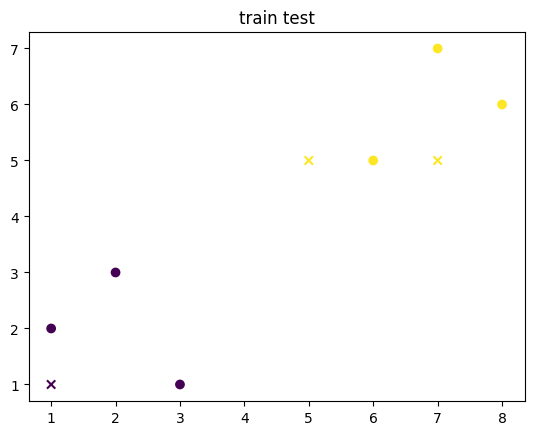

Predictions: [0 1 1]


In [30]:
# Example usage
if __name__ == "__main__":
    # Sample dataset
    X_train = np.array([[1, 2],
                        [2, 3],
                        [3, 1],
                        [6, 5],
                        [7, 7],
                        [8, 6]])
    
    y_train = np.array([0, 0, 0, 1, 1, 1])  # Labels for the dataset

    # Create and fit the model
    knn = KNN(k=3)
    knn.fit(X_train, y_train)

    # Sample test data
    X_test = np.array([[1, 1], [5, 5], [7, 5]])

    # Make predictions
    predictions = knn.predict(X_test)
    # fig, ax = plt.subplots(1, 2)
    fig, ax = plt.subplots()


    ax.set_title('train test')
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=predictions, marker='x')
    # ax[0].set_title('train')
    # ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o')

    # ax[1].set_title('test')
    # ax[1].scatter(X_test[:, 0], X_test[:, 1], c=predictions, marker='x')
    plt.show()
    print("Predictions:", predictions)

# Custom Algo